#Importing Dataset from UCIMLREPO

In [30]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

In [31]:
data = fetch_ucirepo(id=320)
X_raw = data.data.features
Y_raw = data.data.targets

In [32]:
X_raw['final_grade'] = Y_raw['G3']
X_raw.head()

/var/folders/9r/2q20x75923g7w6r2y94yzv3c0000gn/T/ipykernel_34841/3737660176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['final_grade'] = Y_raw['G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [33]:
X_raw.loc[:,'need_counselling'] = (X_raw['final_grade'] < 10).astype(int)

/var/folders/9r/2q20x75923g7w6r2y94yzv3c0000gn/T/ipykernel_34841/652929416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw.loc[:,'need_counselling'] = (X_raw['final_grade'] < 10).astype(int)


In [34]:
X_raw['need_counselling'].value_counts()

need_counselling
0    549
1    100
Name: count, dtype: int64

In [35]:
X_raw.to_csv('../data/student_data.csv', index=False)
df = pd.read_csv('../data/student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade,need_counselling
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/9r/2q20x75923g7w6r2y94yzv3c0000gn/T/ipykernel_34841/3751247439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='need_counselling', palette='Set2')


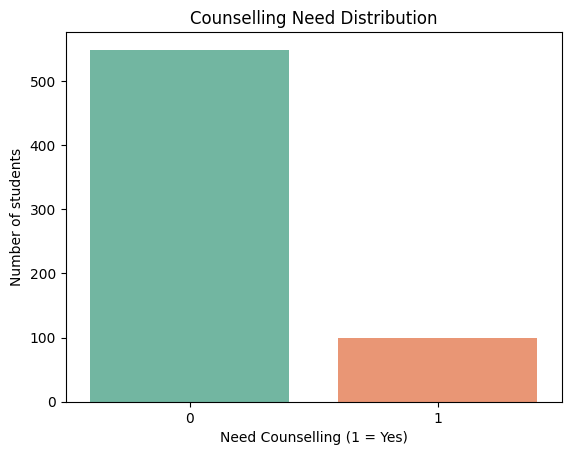

In [37]:
sns.countplot(data=df, x='need_counselling', palette='Set2')
plt.title('Counselling Need Distribution')
plt.xlabel('Need Counselling (1 = Yes)')
plt.ylabel('Number of students')
plt.show()

In [38]:
print(f'Shape of dataset\n{df.shape}')
df.info()

Shape of dataset
(649, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school            649 non-null    object
 1   sex               649 non-null    object
 2   age               649 non-null    int64 
 3   address           649 non-null    object
 4   famsize           649 non-null    object
 5   Pstatus           649 non-null    object
 6   Medu              649 non-null    int64 
 7   Fedu              649 non-null    int64 
 8   Mjob              649 non-null    object
 9   Fjob              649 non-null    object
 10  reason            649 non-null    object
 11  guardian          649 non-null    object
 12  traveltime        649 non-null    int64 
 13  studytime         649 non-null    int64 
 14  failures          649 non-null    int64 
 15  schoolsup         649 non-null    object
 16  famsup            649 non-null    o

In [39]:
df.isnull().sum()

school              0
sex                 0
age                 0
address             0
famsize             0
Pstatus             0
Medu                0
Fedu                0
Mjob                0
Fjob                0
reason              0
guardian            0
traveltime          0
studytime           0
failures            0
schoolsup           0
famsup              0
paid                0
activities          0
nursery             0
higher              0
internet            0
romantic            0
famrel              0
freetime            0
goout               0
Dalc                0
Walc                0
health              0
absences            0
final_grade         0
need_counselling    0
dtype: int64

In [40]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade,need_counselling
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009,0.154083
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656,0.361307
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,1.000000


In [41]:
num_features = df.select_dtypes(include=['int64']).columns.to_list()
cat_features = df.select_dtypes(include=['object']).columns.to_list()



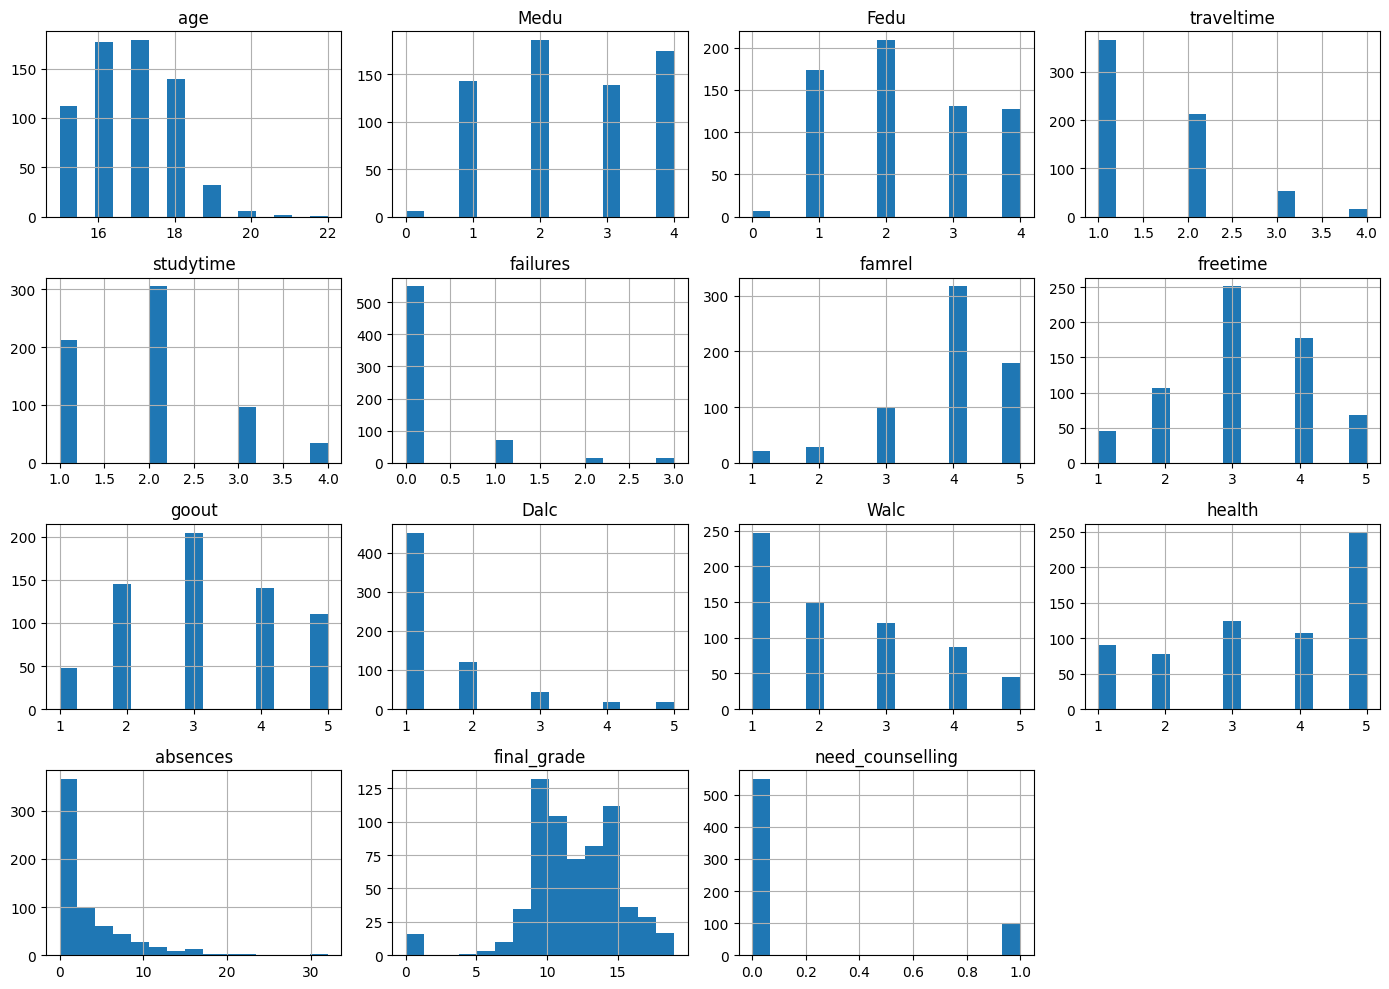

In [42]:
df[num_features].hist(bins=15, figsize=(14,10))
plt.tight_layout()
plt.show()

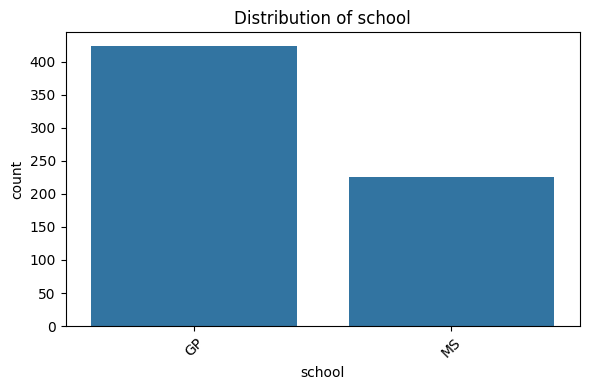

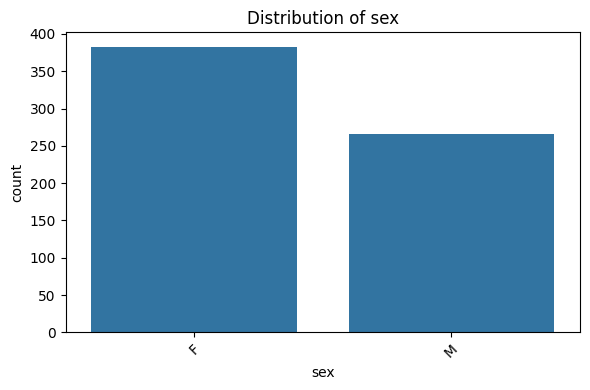

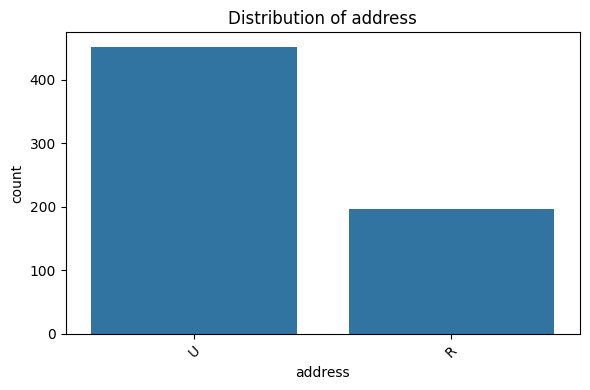

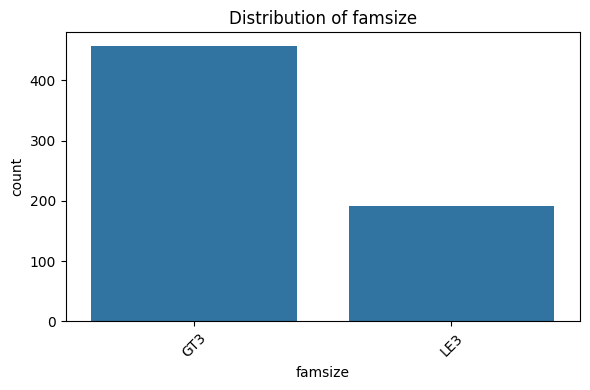

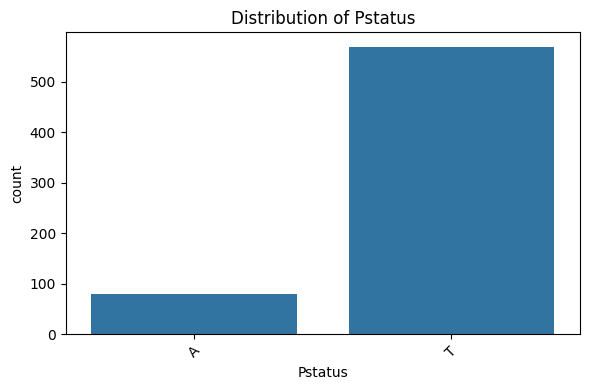

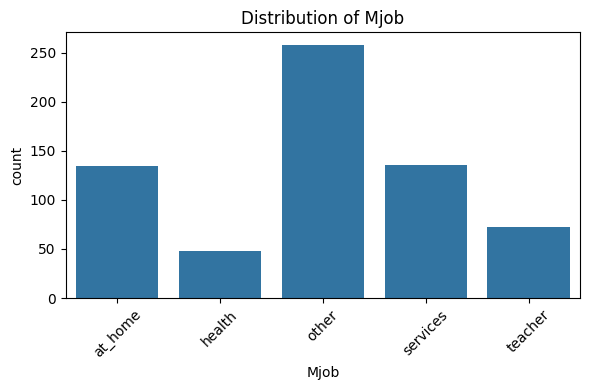

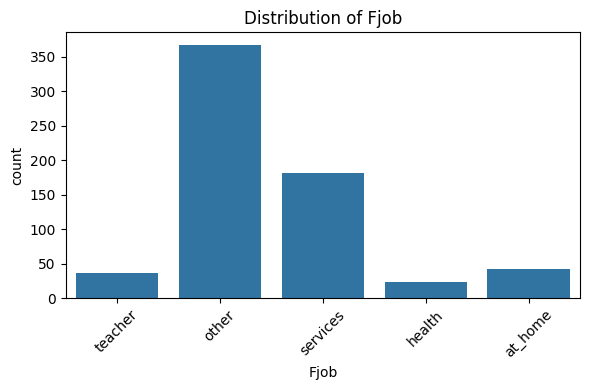

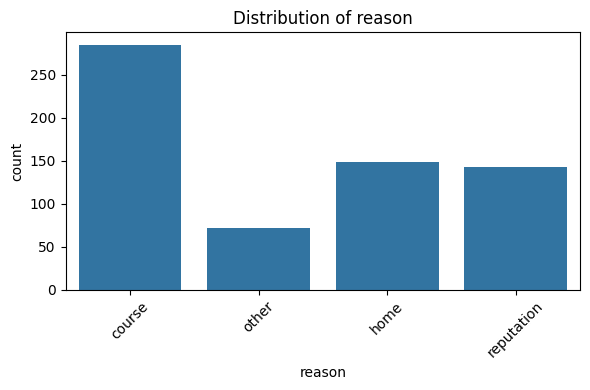

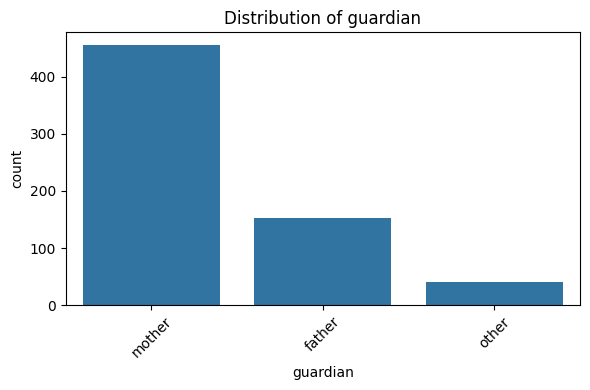

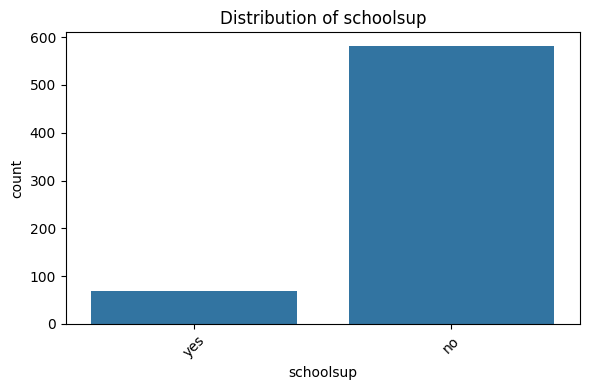

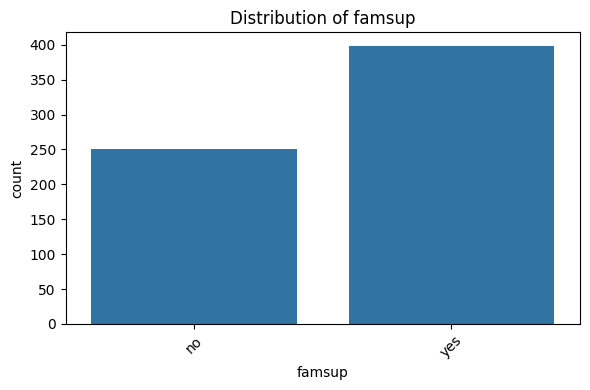

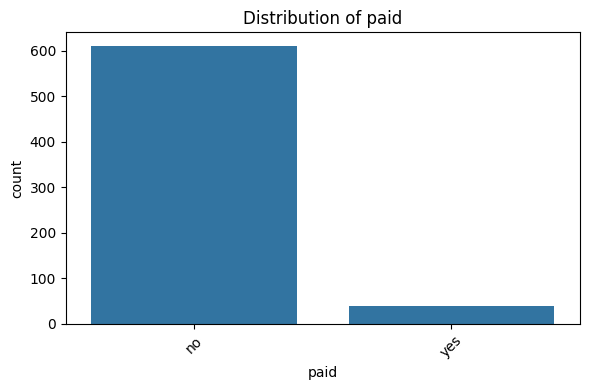

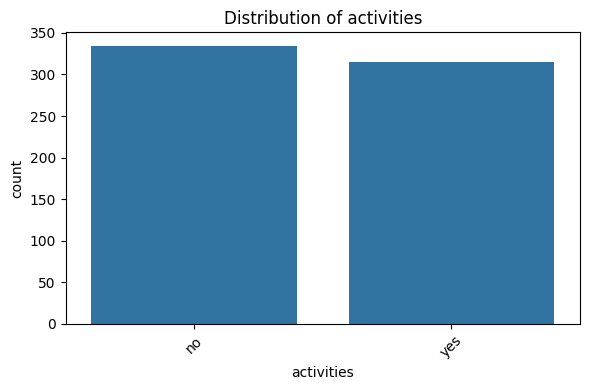

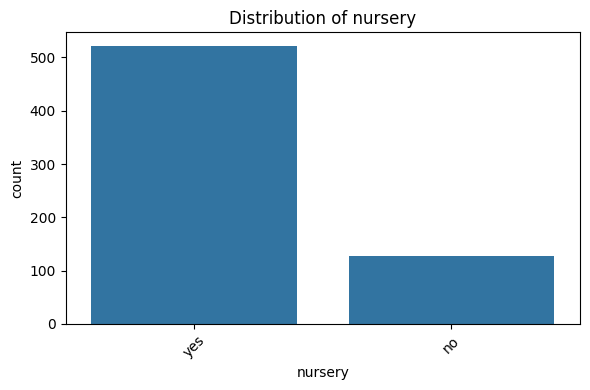

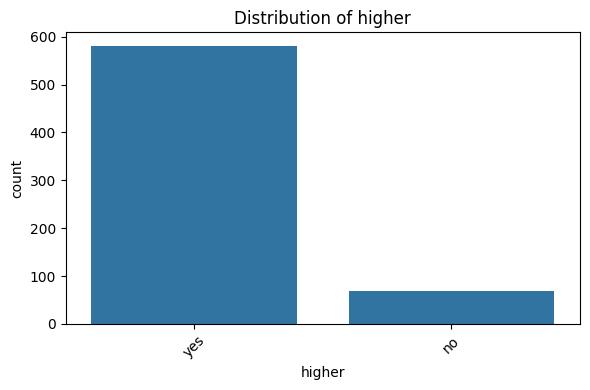

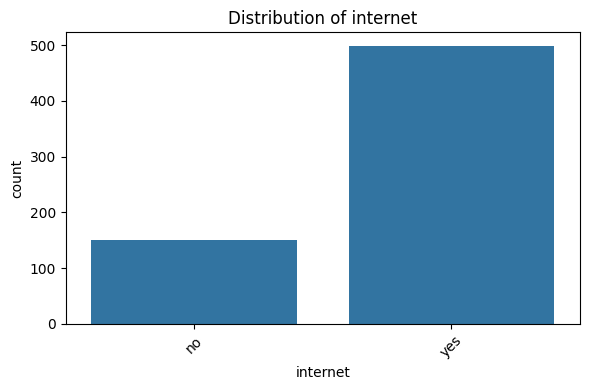

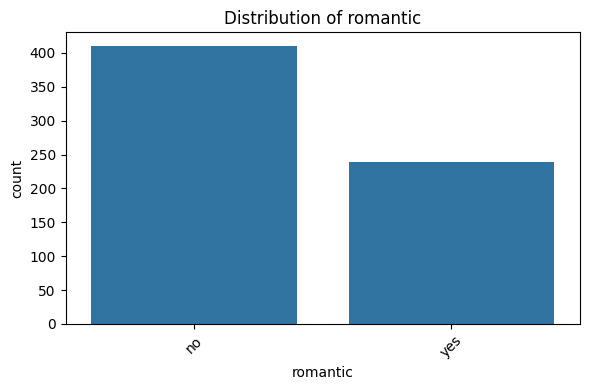

In [43]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [44]:
import numpy as np

# 1. Log-transform absences to reduce skew
df['log_absences'] = np.log1p(df['absences'])

# 2. Binary flag: low study time (1 or 2 considered low)
df['low_studytime'] = (df['studytime'] <= 2).astype(int)

# 3. Binary flag: past failures
df['has_failures'] = (df['failures'] > 0).astype(int)

# 4. Average parental education level
df['avg_parent_edu'] = (df['Medu'] + df['Fedu']) / 2

# 5. Binary flag: socially active students
df['high_goout'] = (df['goout'] >= 4).astype(int)

# 6. Binary flag: heavy weekend alcohol use
df['high_walc'] = (df['Walc'] >= 4).astype(int)



# Confirm new features
df[['log_absences', 'low_studytime', 'has_failures', 'avg_parent_edu', 
    'high_goout', 'high_walc']].describe()


,log_absences,low_studytime,has_failures,avg_parent_edu,high_goout,high_walc
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,1.088613,0.796610,0.154083,2.410632,0.386749,0.203390
std,0.964296,0.402831,0.361307,1.014035,0.487381,0.402831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.500000,0.000000,0.000000
50%,1.098612,1.000000,0.000000,2.500000,0.000000,0.000000
75%,1.945910,1.000000,0.000000,3.000000,1.000000,0.000000
max,3.496508,1.000000,1.000000,4.000000,1.000000,1.000000


In [45]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,final_grade,need_counselling,log_absences,low_studytime,has_failures,avg_parent_edu,high_goout,high_walc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,11,0,1.609438,1,0,4.0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,2,11,0,1.098612,1,0,1.0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,0,1.945910,1,0,1.0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,0,14,0,0.000000,0,0,3.0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,0,13,0,0.000000,1,0,3.0,0,0


In [46]:
# Correlation of all numeric features with target
correlations = df.corr(numeric_only=True)['need_counselling'].sort_values(ascending=False)
print(correlations)


need_counselling    1.000000
has_failures        0.397104
failures            0.380237
Dalc                0.123627
low_studytime       0.120227
Walc                0.116249
age                 0.110722
freetime            0.093349
high_goout          0.090485
absences            0.087483
high_walc           0.081229
log_absences        0.068631
goout               0.067241
traveltime          0.057869
health              0.009979
famrel             -0.044987
Medu               -0.144803
Fedu               -0.146249
avg_parent_edu     -0.160325
studytime          -0.165111
final_grade        -0.663157
Name: need_counselling, dtype: float64


**Encoding Categorical Coloumns**



In [47]:
cat_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col])

In [50]:
print(df[cat_features].head())

   school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0       0    0        1        0        0     0     4       0         1   
1       0    0        1        0        1     0     2       0         0   
2       0    0        1        1        1     0     2       2         1   
3       0    0        1        0        1     1     3       1         1   
4       0    0        1        0        1     2     2       1         0   

   schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  
0          1       0     0           0        1       1         0         0  
1          0       1     0           0        0       1         1         0  
2          1       0     0           0        1       1         1         0  
3          0       1     0           1        1       1         1         1  
4          0       1     0           0        1       1         0         0  


In [51]:

mod_df.to_csv('../data/cleaned_student_data.csv', index=False)

<Axes: xlabel='school', ylabel='count'>

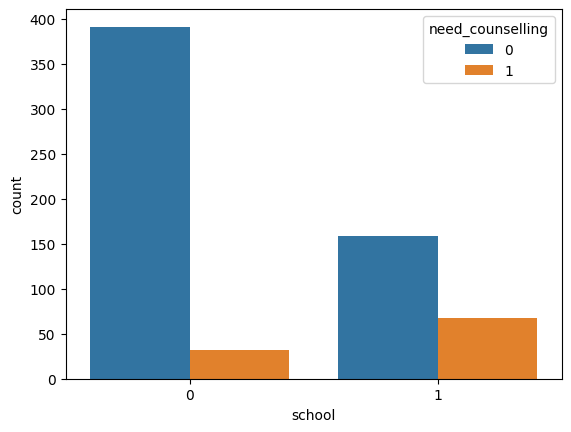

In [52]:
sns.countplot(x='school', hue='need_counselling', data=df)
